In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("magic.csv", header=None)

In [3]:
dataset.head()

,0,1,2,3,4,5,6,7,8,9,10
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19020 entries, 0 to 19019
Data columns (total 11 columns):
0     19020 non-null float64
1     19020 non-null float64
2     19020 non-null float64
3     19020 non-null float64
4     19020 non-null float64
5     19020 non-null float64
6     19020 non-null float64
7     19020 non-null float64
8     19020 non-null float64
9     19020 non-null float64
10    19020 non-null object
dtypes: float64(10), object(1)
memory usage: 1.6+ MB


In [5]:
dataset[10].value_counts()

g    12332
h     6688
Name: 10, dtype: int64

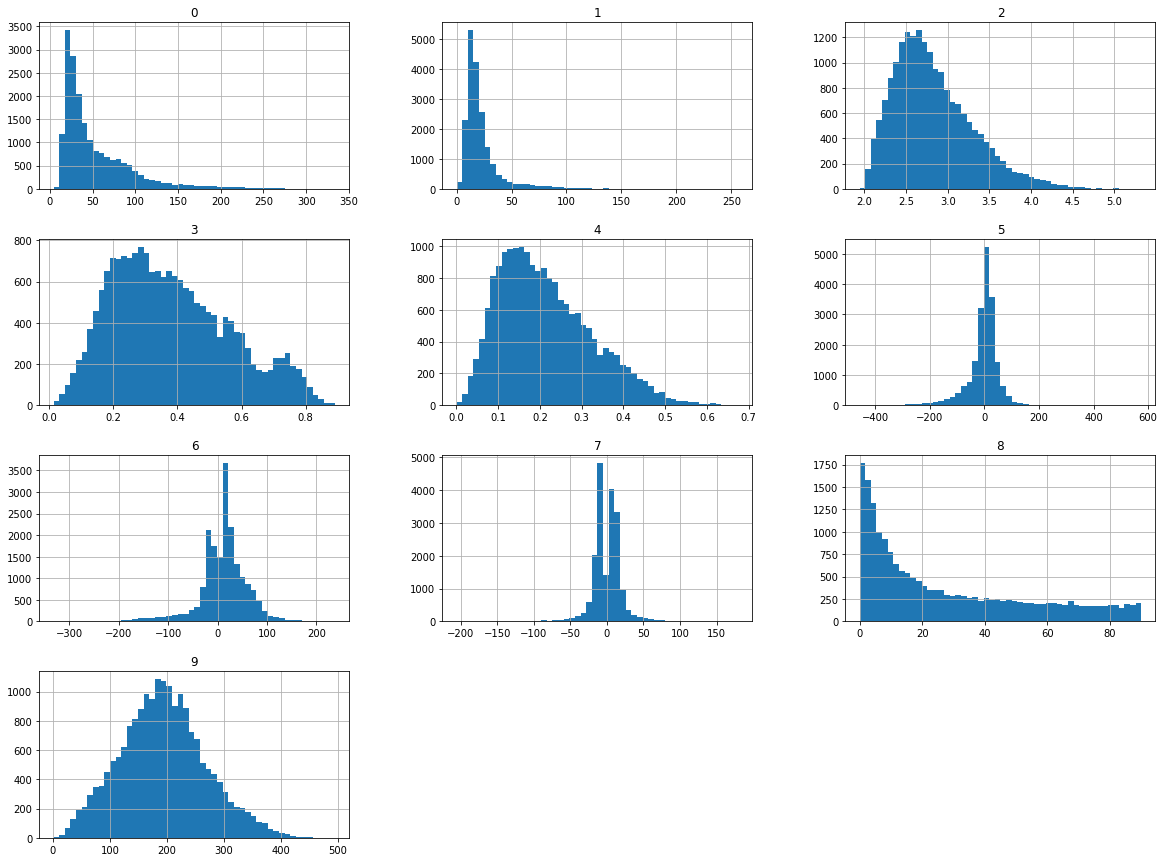

In [6]:
dataset.hist(bins=50, figsize=(20, 15))
plt.show()

In [7]:
corr_matrix = dataset.corr()
corr_matrix[7].sort_values(ascending=False)

7    1.000000
1    0.039744
2    0.015455
0    0.013389
9    0.011427
8    0.004659
5    0.002553
4   -0.010966
3   -0.011294
6   -0.017197
Name: 7, dtype: float64

In [8]:
X = dataset.iloc[:, :10].values
y = dataset.iloc[:, 10].values

In [10]:
from sklearn.preprocessing import LabelBinarizer

encoder = LabelBinarizer()
y = encoder.fit_transform(y)

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [14]:
from sklearn.ensemble import RandomForestClassifier

rforest_clf = RandomForestClassifier(random_state=42)

In [17]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {"n_estimators": [10, 50, 90, 120, 150, 200, 250, 300],
     "criterion": ["gini", "entropy"]}
]

grid_search = GridSearchCV(rforest_clf, param_grid, cv=10, scoring="accuracy", n_jobs=-1)
grid_search.fit(X_train, y_train.ravel())

GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid=[{'n_estimators': [10, 50, 90, 120, 150, 200, 250, 300], 'criterion': ['gini', 'entropy']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [21]:
print("Best accuracy: {0:.3f}".format(grid_search.best_score_))
print("Best params: {0}".format(grid_search.best_params_))

Best accuracy: 0.882
Best params: {'criterion': 'gini', 'n_estimators': 200}


In [29]:
rforest_clf = RandomForestClassifier(criterion="gini", n_estimators=200, random_state=42)
rforest_clf.fit(X_train, y_train.ravel())
y_train_pred_test = rforest_clf.predict(X_test)

In [30]:
confusion_matrix(y_test, y_train_pred_test)

array([[2316,  144],
       [ 303, 1041]])

In [31]:
print("F1 score: {0:.3f}".format(f1_score(y_test, y_train_pred_test)))

F1 score: 0.823


In [24]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(rforest_clf, X_train, y_train.ravel(), cv=10, n_jobs=-1)

In [25]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train, y_train_pred)

array([[9303,  569],
       [1234, 4110]])

In [26]:
from sklearn.metrics import precision_score, recall_score, accuracy_score

print("Precision: {0:.3f}".format(precision_score(y_train, y_train_pred))) 
print("Recall: {0:.3f}".format(recall_score(y_train, y_train_pred)))
print("Accuracy: {0:.3f}".format(accuracy_score(y_train, y_train_pred)))

Precision: 0.878
Recall: 0.769
Accuracy: 0.882


In [32]:
from sklearn.metrics import f1_score

print("F1 score: {0:.3f}".format(f1_score(y_train, y_train_pred)))

F1 score: 0.820


In [34]:
y_scores_forest = cross_val_predict(rforest_clf, X_train, y_train.ravel(), cv=10, method="predict_proba", n_jobs=-1)[:, 1]

In [35]:
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(y_train, y_scores_forest)

In [36]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], "k--")
    plt.axis([0, 1, 0, 1])
    plt.xlabel("False positive")
    plt.ylabel("True positive")

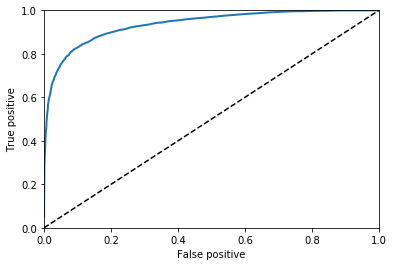

In [37]:
plot_roc_curve(fpr, tpr)
plt.show()

In [40]:
from sklearn.metrics import roc_auc_score

print("Roc auc score: {0:.3f}".format(roc_auc_score(y_train, y_train_pred)))

Roc auc score: 0.856
